In [1]:
import os
import glob
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from scipy.stats import genextreme as gev

from unseen import fileio
from unseen import time_utils
from unseen import indices
from unseen import general_utils

In [2]:
# Parameters
dpi = 300

In [3]:
# Parameters
shapefile = "/g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.shp"
metadata_file = "/home/599/dbi599/forks/unseen/config/dataset_agcd_daily.yml"
rx15day_file = "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_AGCD-CSIRO_r005_1900-2022_annual-aug-to-sep_south-east-coast-drainage-division.zarr.zip"
region_name = "south-east-coast-drainage-division"


In [4]:
assert os.path.isfile(metadata_file), "Must provide a metadata file (papermill option -p metadata_file [filepath])"
assert os.path.isfile(shapefile), "Must provide a shapefile (papermill option -p shapefile [filepath])"
assert 'rx15day_file' in locals(), "Must provide an rx15day output file (papermill option -p rx15day_file [filepath])"
assert 'region_name' in locals(), "Must provide a region name (papermill option -p region_name [name])"

## Generate Rx15day data

In [5]:
agcd_files = glob.glob('/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_*_daily.nc')
agcd_files.sort()

In [6]:
#test = fileio.open_dataset(
#    agcd_files,
#    chunks={'time': 8000, 'lat': 40, 'lon': 40},
#    metadata_file=metadata_file,
#    shapefile=shapefile,
#    variables=['pr'],
#    spatial_agg='mean',
#    input_freq='D',
#    rolling_sum_window=15,
#    time_freq='A-AUG',    
#    time_agg='max',
#)

In [7]:
ds_list = []
for infile in agcd_files:
    print(infile)
    ds = fileio.open_dataset(
        infile,
        metadata_file=metadata_file,
        shapefile=shapefile,
        variables=['pr'],
        spatial_agg='mean', 
    )
    ds = ds.compute()
    ds_list.append(ds)

/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19000101-19001231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19010101-19011231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19020101-19021231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19030101-19031231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19040101-19041231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19050101-19051231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19060101-19061231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19070101-19071231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19080101-19081231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19090101-19091231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19100101-19101231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19110101-19111231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19120101-19121231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19130101-19131231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19140101-19141231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19150101-19151231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19160101-19161231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19170101-19171231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19180101-19181231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19190101-19191231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19200101-19201231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19210101-19211231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19220101-19221231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19230101-19231231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19240101-19241231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19250101-19251231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19260101-19261231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19270101-19271231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19280101-19281231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19290101-19291231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19300101-19301231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19310101-19311231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19320101-19321231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19330101-19331231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19340101-19341231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19350101-19351231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19360101-19361231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19370101-19371231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19380101-19381231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19390101-19391231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19400101-19401231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19410101-19411231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19420101-19421231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19430101-19431231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19440101-19441231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19450101-19451231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19460101-19461231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19470101-19471231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19480101-19481231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19490101-19491231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19500101-19501231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19510101-19511231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19520101-19521231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19530101-19531231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19540101-19541231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19550101-19551231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19560101-19561231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19570101-19571231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19580101-19581231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19590101-19591231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19600101-19601231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19610101-19611231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19620101-19621231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19630101-19631231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19640101-19641231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19650101-19651231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19660101-19661231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19670101-19671231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19680101-19681231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19690101-19691231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19700101-19701231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19710101-19711231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19720101-19721231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19730101-19731231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19740101-19741231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19750101-19751231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19760101-19761231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19770101-19771231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19780101-19781231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19790101-19791231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19800101-19801231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19810101-19811231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19820101-19821231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19830101-19831231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19840101-19841231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19850101-19851231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19860101-19861231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19870101-19871231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19880101-19881231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19890101-19891231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19900101-19901231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19910101-19911231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19920101-19921231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19930101-19931231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19940101-19941231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19950101-19951231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19960101-19961231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19970101-19971231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19980101-19981231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19990101-19991231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20000101-20001231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20010101-20011231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20020101-20021231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20030101-20031231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20040101-20041231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20050101-20051231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20060101-20061231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20070101-20071231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20080101-20081231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20090101-20091231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20100101-20101231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20110101-20111231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20120101-20121231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20130101-20131231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20140101-20141231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20150101-20151231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20160101-20161231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20170101-20171231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20180101-20181231_daily.nc


/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20190101-20220322_daily.nc


In [8]:
ds = xr.concat(ds_list, dim='time')

In [9]:
ds

<xarray.Dataset>
Dimensions:  (time: 44641)
Coordinates:
  * time     (time) object 1900-01-01 09:00:00 ... 2022-03-22 09:00:00
Data variables:
    pr       (time) float32 2.084 0.2928 0.1212 0.4116 ... 3.719 0.1759 0.0233
Attributes: (12/33)
    CDI:                           Climate Data Interface version ?? (http://...
    history:                       Tue Sep 03 14:23:23 2019: cdo -O -z zip_4 ...
    institution:                   Australian Bureau of Meteorology, GPO Box ...
    Conventions:                   CF-1.6
    geospatial_lat_min:            -44.525
    geospatial_lat_max:            -9.975
    ...                            ...
    url:                           http://www.bom.gov.au/climate/
    licence:                       Copyright for any data supplied by the Bur...
    id:                            Australian Gridded Climate Data (AGCD)
    summary:                       The daily and monthly rainfall data repres...
    naming_authority:              au.gov.bom
    CDO:                           Climate Data Operators version 1.7.0 (http...

In [10]:
ds = ds.compute()

In [11]:
clim = ds.groupby('time.month').mean()
clim

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pr       (month) float32 3.651 4.246 3.811 2.796 ... 1.721 2.308 2.811 3.183

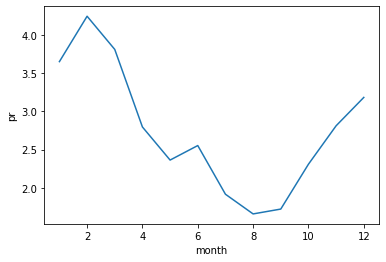

In [12]:
clim['pr'].plot()

In [13]:
ds_15day = ds.rolling({'time': 15}).sum()
ds_rx15day = time_utils.temporal_aggregation(ds_15day, 'A-AUG', 'D', 'max', ['pr'])

In [14]:
ds_rx15day

<xarray.Dataset>
Dimensions:  (time: 123)
Coordinates:
  * time     (time) object 1900-08-31 00:00:00 ... 2022-08-31 00:00:00
Data variables:
    pr       (time) float64 164.3 126.0 106.6 109.6 ... 114.0 299.4 315.1 378.1
Attributes: (12/33)
    CDI:                           Climate Data Interface version ?? (http://...
    history:                       Tue Sep 03 14:23:23 2019: cdo -O -z zip_4 ...
    institution:                   Australian Bureau of Meteorology, GPO Box ...
    Conventions:                   CF-1.6
    geospatial_lat_min:            -44.525
    geospatial_lat_max:            -9.975
    ...                            ...
    url:                           http://www.bom.gov.au/climate/
    licence:                       Copyright for any data supplied by the Bur...
    id:                            Australian Gridded Climate Data (AGCD)
    summary:                       The daily and monthly rainfall data repres...
    naming_authority:              au.gov.bom
    CDO:                           Climate Data Operators version 1.7.0 (http...

In [15]:
time_stamp = datetime.datetime.now().strftime("%a %b %d %H:%M:%S %Y")
ds_rx15day.attrs['history'] = f'{time_stamp}: /home/599/dbi599/east-coast-rain/AGCD_{region_name}.ipynb (git@github.com:AusClimateService/east-coast-rain)'
fileio.to_zarr(ds_rx15day, rx15day_file)

## Analyse and plot Rx15day data

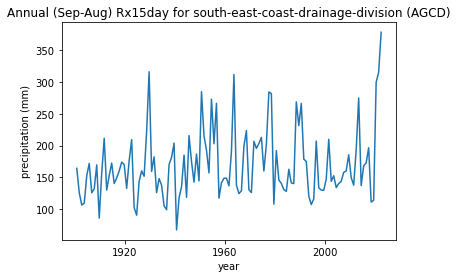

In [16]:
ds_rx15day['pr'].plot()
plt.title(f'Annual (Sep-Aug) Rx15day for {region_name} (AGCD)')
plt.ylabel('precipitation (mm)')
plt.xlabel('year')
plt.savefig(
    f'/g/data/xv83/dbi599/east-coast-rain/figures/Rx15day_timeseries_AGCD_{region_name}.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=dpi
)
plt.show()

In [17]:
years = ds_rx15day['time'].dt.year.values
df_rx15day = pd.DataFrame(index=years)
df_rx15day['pr'] = ds_rx15day['pr'].values

In [18]:
df_rx15day['pr'].sort_values(ascending=False).head(n=10)

2022    378.092957
1929    316.038940
2021    315.107513
1963    311.629669
2020    299.363068
1950    284.655304
1977    284.300171
1978    281.615540
2013    274.800537
1954    272.904175
Name: pr, dtype: float64

In [19]:
rx15day_max = df_rx15day['pr'].values.max()
print(rx15day_max)

378.09295654296875


In [20]:
def gev_analysis(ds, event, region, savefig=False):
    """Perform GEV analysis
    
    Args:
      ds (Pandas Series): Data sample
      event (float) : Event of interest
      region (str) : Name of spatial region
    """

    gev_shape, gev_loc, gev_scale = indices.fit_gev(ds.values)
    print(f'Shape parameter: {gev_shape:.2f}')
    print(f'Location parameter: {gev_loc:.2f}')
    print(f'Scale parameter: {gev_scale:.2f}')

    fig, ax = plt.subplots(figsize=[10, 8])
    gev_xvals = np.arange(0, 700)
    ds.plot.hist(bins=40, density=True, color='tab:green', alpha=0.5)
    gev_pdf = gev.pdf(gev_xvals, gev_shape, gev_loc, gev_scale)
    plt.plot(gev_xvals, gev_pdf, color='tab:green', linewidth=4.0)
    plt.xlabel('precipitation (mm)')
    plt.ylabel('probability')
    plt.title(f'Annual (Sep-Aug) Rx15day for {region} (AGCD)')
    if savefig:
        plt.savefig(
            f'/g/data/xv83/dbi599/east-coast-rain/figures/Rx15day_histogram_AGCD_{region}.png',
            bbox_inches='tight',
            facecolor='white',
            dpi=dpi
        )
    plt.show()
    
    gev_data = gev.rvs(gev_shape, gev_loc, gev_scale, size=5000000)
    percentile, return_period = general_utils.event_in_context(gev_data, event, 'above')
    print(f'{percentile:.2f}% percentile')
    print(f'{return_period:.0f} year return period\n')

Shape parameter: -0.04
Location parameter: 144.80
Scale parameter: 39.66


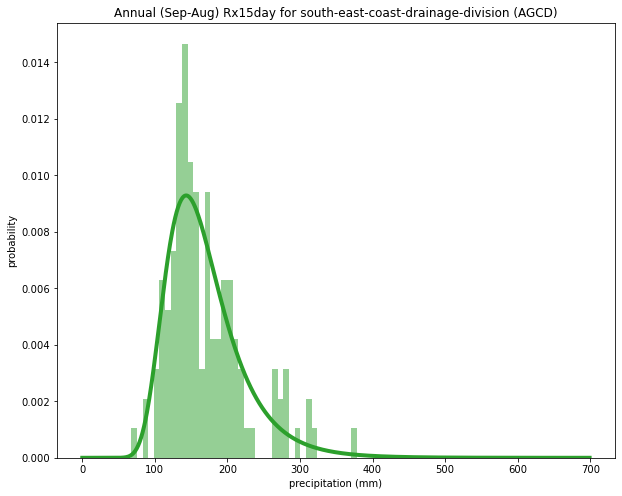

99.47% percentile
188 year return period



In [21]:
gev_analysis(df_rx15day['pr'], rx15day_max, region_name, savefig=True)

Shape parameter: -0.02
Location parameter: 144.66
Scale parameter: 38.97


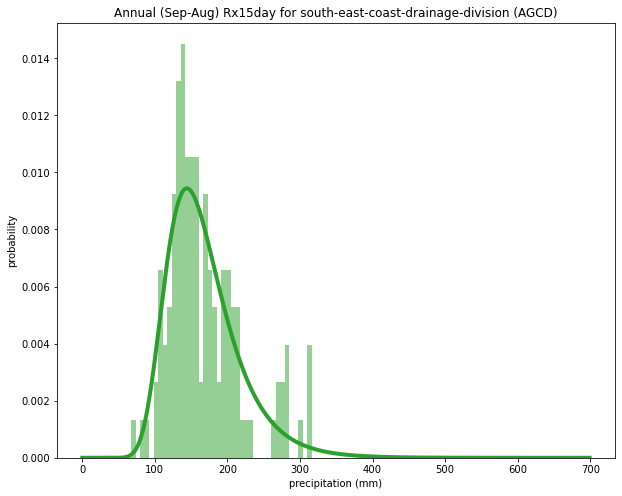

99.68% percentile
309 year return period



In [22]:
gev_analysis(df_rx15day['pr'][:-1], rx15day_max, region_name)